In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## 1. Importing data and splitting to input and output features

In [2]:
df = pd.read_csv('HIV1-inhibitor_pIC50_pubchem_fp.csv')

In [3]:
#input
x = df.drop('pIC50', axis = 1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7440,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7441,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7442,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#output
y = df['pIC50']
y

0       5.045757
1       5.853872
2       6.000000
3       5.769551
4       6.000000
          ...   
7439    5.408935
7440    5.677781
7441    4.823909
7442    5.154902
7443    5.004365
Name: pIC50, Length: 7444, dtype: float64

In [5]:
x.shape, y.shape

((7444, 881), (7444,))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021)

## 2. Building Model

In [7]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
r2 = model.score(x_test, y_test)
r2

0.3982196446249867

In [8]:
y_pred = model.predict(x_test)

C:\Users\jeta7\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

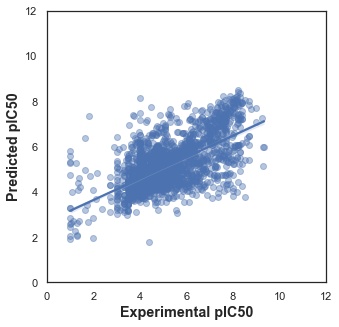

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## 3. Calculating theoretical molecule fingerprint

In [27]:
weights = pd.DataFrame(model.feature_importances_)
weights = weights.rename(columns = {0: 'feature_weights'})
weights.describe()

,feature_weights
count,881.000000
mean,0.001135
std,0.005019
min,0.000000
25%,0.000000
50%,0.000246
75%,0.001084
max,0.136575


In [17]:
import numpy as np
percentile_90 = np.percentile(weights, 90)
percentile_90

0.0029039181638488122

In [28]:
predicted_fp_90 = []

for i in weights['feature_weights']:
    if i >= percentile_90:
        predicted_fp_90.append(1)
    else:
        predicted_fp_90.append(0)

In [79]:
col = df.columns[:-1]
col

Index(['PubchemFP0', 'PubchemFP1', 'PubchemFP2', 'PubchemFP3', 'PubchemFP4',
       'PubchemFP5', 'PubchemFP6', 'PubchemFP7', 'PubchemFP8', 'PubchemFP9',
       ...
       'PubchemFP871', 'PubchemFP872', 'PubchemFP873', 'PubchemFP874',
       'PubchemFP875', 'PubchemFP876', 'PubchemFP877', 'PubchemFP878',
       'PubchemFP879', 'PubchemFP880'],
      dtype='object', length=881)

In [93]:
df_pred = pd.DataFrame(predicted_fp_90).transpose()
df_pred.columns = col
df_pred.to_csv("predicted_molecule_90_fp.csv")

## 4. Finding molecules with similar fingerprints

In [114]:
mapping = dict(zip(col, predicted_fp_90))

fp1 = []

for i in mapping.keys():
    if mapping[i] == 1:
        fp1.append(i)

In [115]:
df2 = pd.read_csv('descriptors_output.csv')
df2.index = df2['Name']
df2 = df2.drop('Name', axis = 1)

In [124]:
df_fp1 = df2[fp1]
df_fp1

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP143,...,PubchemFP706,PubchemFP707,PubchemFP712,PubchemFP713,PubchemFP734,PubchemFP738,PubchemFP797,PubchemFP801,PubchemFP803,PubchemFP836
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL143614,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL143614,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL67076,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CHEMBL67076,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CHEMBL144118,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL4649461,1,1,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
CHEMBL4647024,1,1,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
CHEMBL4644631,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
score = pd.DataFrame(df_fp1.sum(axis=1), columns = ['score'])
score

,score
Name,
CHEMBL143614,14
CHEMBL143614,14
CHEMBL67076,18
CHEMBL67076,18
CHEMBL144118,18
...,...
CHEMBL4649461,31
CHEMBL4647024,31
CHEMBL4644631,27


In [133]:
df_final = pd.concat([df2,score], axis=1)

In [139]:
df_final = df_final.sort_values(by = 'score', ascending = False)

In [142]:
#highest matching
df_final['score'].head(10)

Name
CHEMBL2011884    70
CHEMBL2012380    67
CHEMBL2012381    67
CHEMBL2012007    67
CHEMBL2011886    67
CHEMBL2011785    67
CHEMBL2012379    67
CHEMBL2011883    66
CHEMBL2012128    65
CHEMBL2011881    65
Name: score, dtype: int64

In [143]:
#maximum possible score
len(fp1)

89

In [144]:
df_final.to_csv("molecule_fp90_scores.csv")